In [1]:
from get_dataset import * 
import matplotlib.pyplot as plt
import numpy as np

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.15) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-04-14 19:23:56.169805: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
ds = get_dataset("train")

2023-04-14 19:23:58.891128: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7619 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:01:00.0, compute capability: 8.6


In [6]:
ds = tf.data.Dataset.list_files(CACHE_PATH+"train"+"*")

In [7]:
ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(61, 101), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>

In [3]:
a = 0
for x in ds:
    a = a + 1

a

2023-04-14 19:24:01.470733: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


51428

In [6]:
def empty_gen():
    yield 1

new_ds = tf.data.Dataset.from_generator(empty_gen, output_signature=(
        tf.TensorSpec(shape=(61, 101), dtype=tf.float32),
        tf.TensorSpec(shape=(), dtype=tf.int32)))

In [7]:
new_ds = new_ds.cache("./tf_cache/test")

In [12]:
next(iter(new_ds))

(<tf.Tensor: shape=(61, 101), dtype=float32, numpy=
 array([[ 3.3198495 ,  3.095035  ,  1.8987665 , ..., -0.25404093,
         -0.24745224, -0.22169906],
        [ 3.2006211 ,  3.0191193 ,  1.9803237 , ..., -0.24279335,
         -0.2374034 , -0.20466828],
        [ 3.2801883 ,  3.101814  ,  2.1029787 , ..., -0.22650166,
         -0.23482497, -0.22425611],
        ...,
        [ 3.298637  ,  3.0999246 ,  2.0425508 , ..., -0.21456452,
         -0.2571167 , -0.23039879],
        [ 3.1710365 ,  2.923687  ,  1.6679794 , ..., -0.22399443,
         -0.22362456, -0.2049304 ],
        [ 3.6077359 ,  3.4854505 ,  2.6298823 , ..., -0.26789287,
         -0.2649563 , -0.2362682 ]], dtype=float32)>,
 <tf.Tensor: shape=(), dtype=int32, numpy=10>)

In [4]:
spectrogram = a[0].numpy()
log_spec = np.log(spectrogram.T + np.finfo(float).eps)
plt.pcolormesh(spectrogram.T)

TypeError: 'int' object is not subscriptable

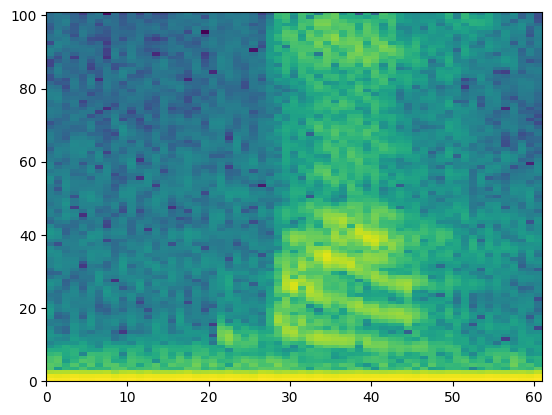

In [4]:
spectrogram = a[0].numpy()
log_spec = np.log(spectrogram.T + np.finfo(float).eps)
plt.pcolormesh(log_spec)